In [2]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:\n

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?
Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [5]:
#globals creates a global variable, sets the string as a dataframe variable

AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-15,162.199997,160.139999,160.660004,161.600006,29465500.0,159.192978
2017-08-16,162.509995,160.149994,161.940002,160.949997,27671600.0,158.552673
2017-08-17,160.710007,157.839996,160.520004,157.860001,27940600.0,155.508698
2017-08-18,159.500000,156.720001,157.860001,157.500000,27428100.0,155.154068
2017-08-21,157.889999,155.110001,157.500000,157.210007,26368500.0,154.868378


In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,175.873360,173.144704,174.451265,174.555139,2.967539e+07,173.019559
std,13.168089,13.247808,13.147302,13.280109,1.262228e+07,13.838907
min,151.830002,149.160004,149.990005,150.550003,1.251390e+07,148.307571
25%,166.330002,162.880005,164.000000,164.220001,2.081060e+07,163.017471
50%,174.869995,172.080002,173.410004,173.139999,2.613200e+07,171.654556
75%,187.070007,183.800003,185.229996,185.399994,3.500530e+07,184.687607
max,210.949997,208.330002,210.160004,209.750000,8.659380e+07,209.750000


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-08-15 to 2018-08-15
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


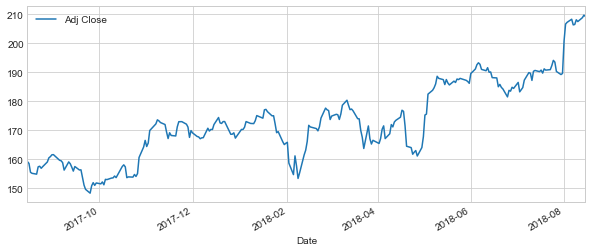

In [8]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

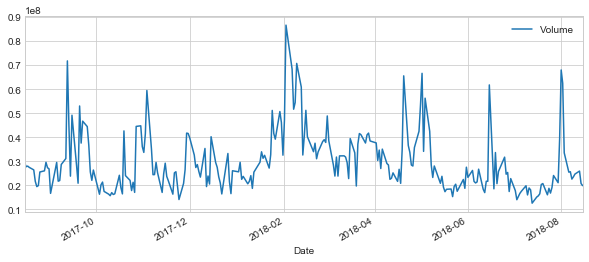

In [9]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [19]:
ma_day = [int(10),int(20),int(50)]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

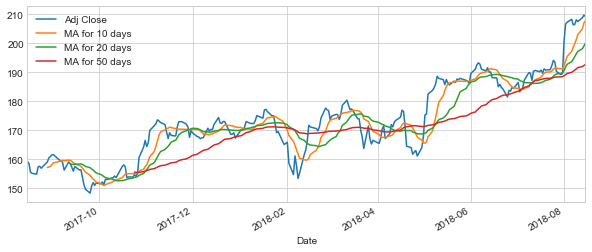

In [22]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,
                                                                           figsize=(10,4))

In [23]:


#### DAILY RETURNS #####




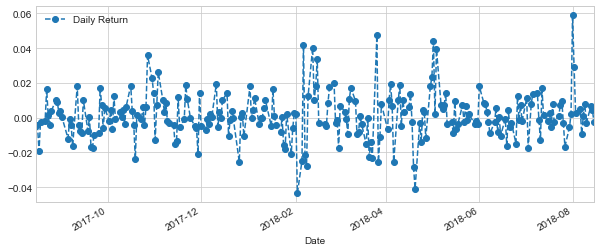

In [26]:
AAPL['Daily Return' ] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle = '--', marker='o')

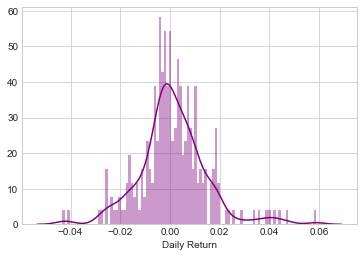

In [27]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color= 'purple')

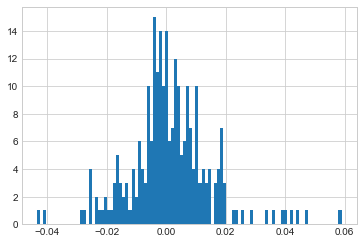

In [28]:
AAPL['Daily Return'].hist(bins=100)

In [29]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close'] # created a dframe called that contains 
#closing only

In [30]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-08-15,159.192978,982.739990,922.219971,71.923759
2017-08-16,158.552673,978.179993,926.960022,72.346153
2017-08-17,155.508698,960.570007,910.979980,71.118286
2017-08-18,155.154068,958.469971,910.669983,71.206688
2017-08-21,154.868378,953.289978,906.659973,70.872696


In [33]:
tech_rets = closing_df.pct_change()

In [34]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-08-15,NaN,NaN,NaN,NaN
2017-08-16,-0.004022,-0.004640,0.005140,0.005873
2017-08-17,-0.019199,-0.018003,-0.017239,-0.016972
2017-08-18,-0.002280,-0.002186,-0.000340,0.001243
2017-08-21,-0.001841,-0.005404,-0.004403,-0.004690


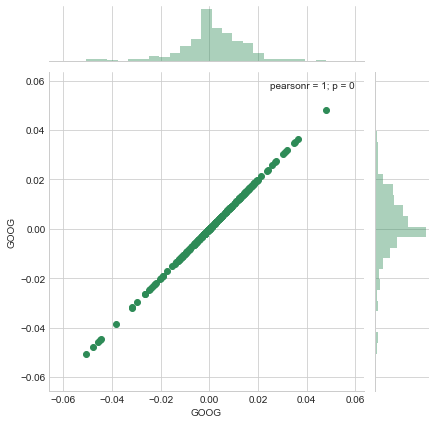

In [37]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter', color='seagreen')

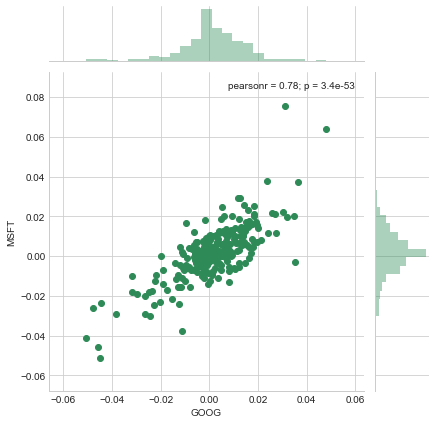

In [38]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter', color='seagreen')

In [39]:
"""
Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.
"""

'\nIntersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:\n\nurl - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient\n\nBut for a quick intuitive sense, check out the picture below.\n'

In [40]:
##### PAIR PLOTS VIA SEABORN/PANDAS ####

In [41]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-08-15,NaN,NaN,NaN,NaN
2017-08-16,-0.004022,-0.004640,0.005140,0.005873
2017-08-17,-0.019199,-0.018003,-0.017239,-0.016972
2017-08-18,-0.002280,-0.002186,-0.000340,0.001243
2017-08-21,-0.001841,-0.005404,-0.004403,-0.004690


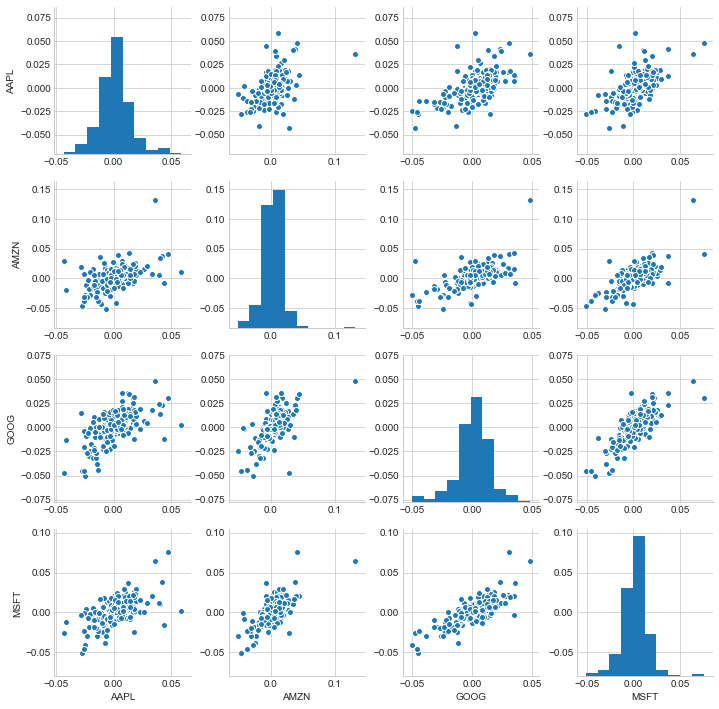

In [43]:
sns.pairplot(tech_rets.dropna())

/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


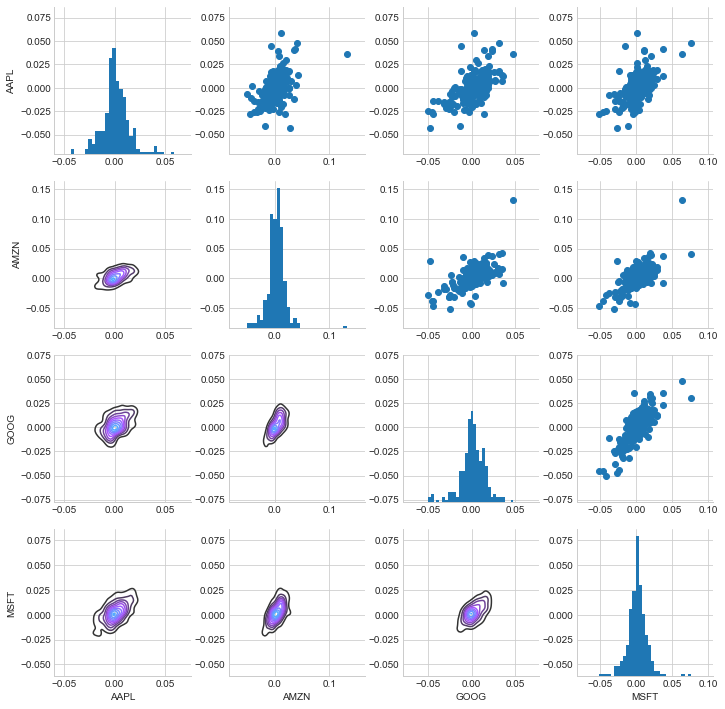

In [48]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/phil/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


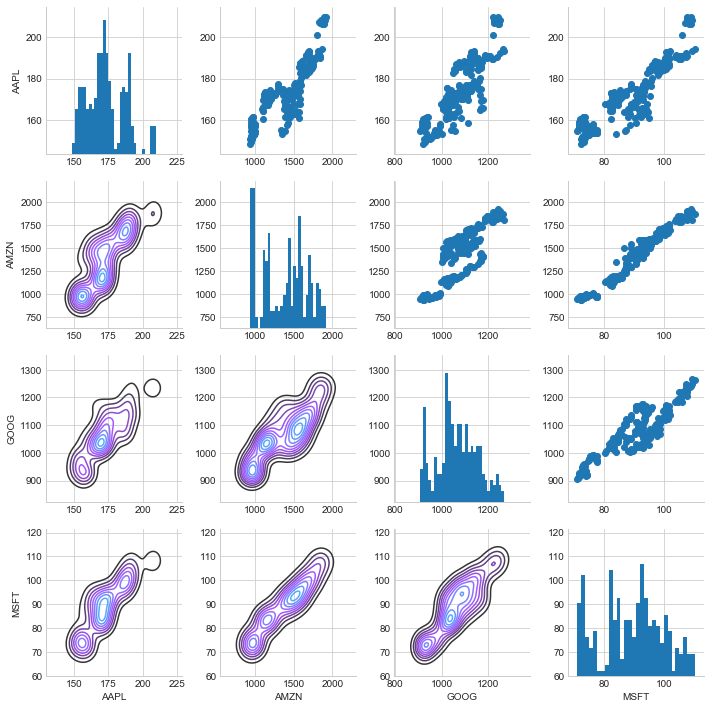

In [49]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

In [50]:
# Correlation plots

sns.corrplot(tech_rets.dropna(),annot=True)

AttributeError: module 'seaborn' has no attribute 'corrplot'

In [51]:
tech_corr = tech_rets.corr()

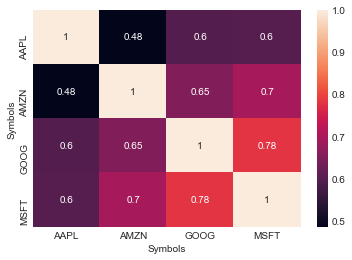

In [53]:
sns.heatmap(tech_corr,annot=True)